In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:/Users\draco\Desktop/Python Boot Camp/Jupyter/New_olympics.csv')
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


Athletes winning ,edals in Beijing Olympics 100m or 200m track event

Pull data

In [5]:
mw = df[(df.Edition == 2008) & ( (df.Event == '100m') | (df.Event == '200m') )]
mw

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27551,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,100m,M,Bronze
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27553,Beijing,2008,Athletics,Athletics,"THOMPSON, Richard",TRI,Men,100m,M,Silver
27554,Beijing,2008,Athletics,Athletics,"FRASER, Shelly-ann",JAM,Women,100m,W,Gold
27555,Beijing,2008,Athletics,Athletics,"SIMPSON, Sherone",JAM,Women,100m,W,Silver
27556,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,100m,W,Silver
27569,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,200m,M,Bronze
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold
27571,Beijing,2008,Athletics,Athletics,"CRAWFORD, Shawn",USA,Men,200m,M,Silver
27572,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,200m,W,Bronze


group

In [15]:
g = mw.groupby(['NOC','Gender','Discipline', 'Event']).size()
g

NOC  Gender  Discipline  Event
JAM  Men     Athletics   100m     1
                         200m     1
     Women   Athletics   100m     3
                         200m     2
TRI  Men     Athletics   100m     1
USA  Men     Athletics   100m     1
                         200m     2
     Women   Athletics   200m     1
dtype: int64

Unstacking will remove topics from output

must assign variable when stacking after unstack

In [17]:
gf = g.unstack(['Discipline','Event'])
gf

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

Stack

DataFrame.stack(level =-1, dropna=True)

Pivot a level of the column labels, returing a DataFrame or Series, with a new innermost level of row labels

stack()

In [18]:
gf.stack()

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

In [19]:
gf.stack('Event')

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

unstack()

In [20]:
gf.unstack()

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

In [21]:
gf.unstack('Gender')

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

Challenge !!!!

Plot the number of gold medals won by the USA male and female athletes throughout the history of the Olympics.

In [23]:
# Pull data mw = df[(df.Edition == 2008) & ( (df.Event == '100m') | (df.Event == '200m') )]
gu = df[(df.Medal == 'Gold') & (df.NOC == 'USA')]
gu

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
...,...,...,...,...,...,...,...,...,...,...
29048,Beijing,2008,Volleyball,Volleyball,"ROONEY, Sean",USA,Men,volleyball,M,Gold
29049,Beijing,2008,Volleyball,Volleyball,"SALMON, Riley",USA,Men,volleyball,M,Gold
29050,Beijing,2008,Volleyball,Volleyball,"STANLEY, Clayton",USA,Men,volleyball,M,Gold
29051,Beijing,2008,Volleyball,Volleyball,"TOUZINSKY, Scott",USA,Men,volleyball,M,Gold


In [27]:
# group that data g = mw.groupby(['NOC','Gender','Discipline', 'Event']).size()
mng = gu.groupby(['Medal','NOC','Gender']).size()
mng


Medal  NOC  Gender
Gold   USA  Men       1577
            Women      579
dtype: int64

In [30]:
#fo.Sport.value_counts().plot(kind='line'); added semi colon to remove plot title
#mng.Gender.value_counts().plot(kin)

Answer

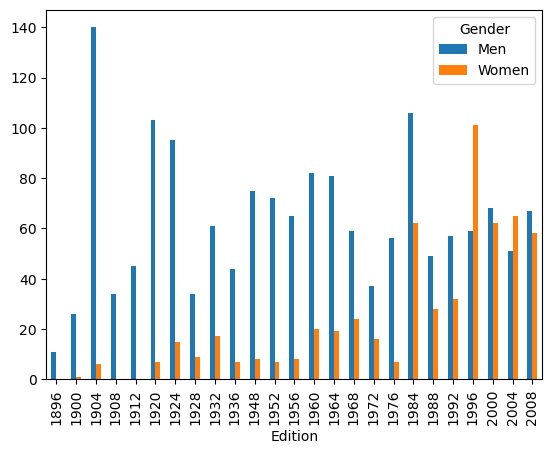

In [36]:
gu = df[(df.NOC == 'USA') & (df.Medal == 'Gold')]
gu.groupby(['Edition', 'Gender']).size().unstack('Gender',fill_value=0).plot(kind='bar');

plot the five athletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals and then bronze medals.

<Axes: xlabel='Athlete'>

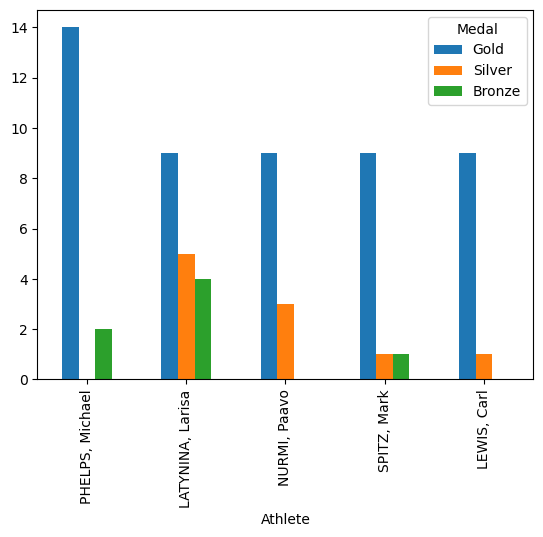

In [40]:
#First group data, Unstack, create variable to sort values, add Plot
g = df.groupby(['Athlete', 'Medal']).size().unstack('Medal',fill_value=0)
g.sort_values(['Gold','Silver','Bronze'], ascending=False)[['Gold', 'Silver','Bronze']].head().plot(kind='bar')